## Machine Learning

- Python is one of the premier languages for machine learning
    - one of the most extensive libraries used is `scikit-learn`
    - Can be used for:
    - Data processing 
    - Feature Selection
    - Models
    - Parameter Tuning


## What is machine learning?

- Rather than caring about how one particular variable affects the outcome, machine learning is about *prediction*.

$$
y = f(x;\varepsilon)
$$

- The goal is to get a get $\hat{y}$
- The different models we choose are basically trying to find a suitable function $f$.
    $f$ can be defined with a functional form (polynomial, linear) or through a complicated non-linear function (tree methods)

## Supervised vs. Unsupervised

- Machine learning can be broadly broken down into supervised, unsupervised, and reinforcement learning (not discussed here)
    - Supervised: There is a "target" or "label" to learn
        - In this case, $y$ is known and and $f$ is found
    - Unsupervised: No $y$; try to find patterns in the data

## Classification vs. Regression

- In machine learning there is natural division between problems: classification and regression
- This is determined by the form of $y$. 
    - If $y$, the label, is binary/categorical:  classification
        - If there are multiple categories (cat, dog, bird): multi-class
        - If something can be multiple labels at the same time (mammal, bird, reptile -> platypus): multi-label
    - If $y$ is continuous: regression
- Note: $y$ need not be a vector, you can predict multiple outcomes at the same time: multi-output

## Data

- Most data processing can be done in `pandas`
- `sklearn` plays well with `pandas` 
- Data quality is, as always, the most important thing with ML
    - Garbage in, garbage out
- All the skills you gained about data for econometrics applies to ML as well
    - This means, missing values, outliers, and measurement error
    - This can all have large effects on performance
- Additionally, `sklearn` provides functions for data processing such as normalization, "one-hot encoding" (creating dummies) and others
- `sklearn` provides tools for creating "pipelines" that feed data processing into models for reproducible flows


## The Basic ML Workflow

```mermaid
graph LR
    A[Data Cleaning] --> B[Data Processing] --> C["Data Split (Training/Test/Validation)"] --> D[Parameter Tuning] --> E[Model Training] --> F[Predict on Testing Set] --> G[Adjust]  --> B 
```

- Notice that you might need to iterate until you get to a model that is reliable and predicts well

## The Golden Rule for ML

- The most important rule in ML is about data contamination
    - No matter what you do, it's important to make sure that training data doesn't affect testing data in a way that might inadvertantly transfer information.
        - This can apply to the way you process data
            - Normalizing data using both training and testing dataset
            - Splitting data in a way that the same observations are in both (this can happens with hierarchical data)
            

## Data Splitting

- Data should be split at least into two parts:
    - Training and testing
    - All data processors should be fit on only the training data to minimize the chances of contamination
- Often there are parameters that need to be tuned and optimized in the model  
    - Training - Validation - Testing
    - Train and test on validation
        - Iterate and find best parameters
        - Then Train on Training + Validation and test on Testing

## Why isn't that enough?

- When you randomly split the data, the training and testing sets might just have specific attributes that you get in the "luck" of the draw
    - Perhaps your random sample has too much of a particular label, or too little of a particular variable
- To minimize this, you can split the data into multiple parts to minimize that any one split of the data has too much "specificity."
- This is called Kfold Splitting and training and testing on each subset is called *cross-validation*.

![](figures/sphx_glr_plot_cv_indices_002.png)

## Parameter Tuning

- Sometimes some models have extra parameters that need to be calibrated/tuned
- You can find this parameter using "grid-search" cross-validation
    - Essentially brute force search on different parameters settings and optimal numbers are found by cross-validation

## Overfitting vs. Underfitting

- This is an important concept in ML as it is what determines whether the model is any good once you start predicting out-of-sample
- Overfitting is why we might want to do k-fold cross-validation
    - We don't want our model ot learn any specific features of the DATA sample we have
- This brings us back to the idea of bias vs. variance.
    - Bias in ML is a little different than in causal inference (although it's really the same thing)

Recall that $MSE = E(Y - \hat{Y})^2$

You can decompose this to the the canonical expression that $MSE = Bias^2 + Variance$


In causal econometrics, we usually start with the notion that we want to find an estimator where $Bias=0$ and then we find the best unbiased estimator for some class of models
- For linear models, that's OLS

In ML, bias is not something to avoid completely, but it is something to reduce as it reduces overall error
    - often comes from model misspecification

- There is a Bias-Variance tradeoff and in ML the driving force is model/algorithmic complexity. 

![](figures/Copy-of-Add-a-subheading5.png)

If a model is very misspecified and does not fit the data well, it is *biased* and is said to be "underfit"

If a model fit the data too well, and has very low variance, but is not generalizable to data outside the sample.

![](figures/overfitting-and-underfitting-wrt-model-error-vs-complexity-768x443.png)




## Getting Started

```
pip install scikit-learn
```

In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler # Different scalers comparison: https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#plot-all-scaling-standard-scaler-section
from sklearn.linear_model import LassoCV, Lasso, LinearRegression
from sklearn.datasets import load_iris, make_regression, make_blobs, load_diabetes, make_classification
import seaborn as sns
import statsmodels.formula.api as smf
import pandas as pd
from sklearn.model_selection import KFold, train_test_split, ValidationCurveDisplay, cross_validate, LearningCurveDisplay, GridSearchCV
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import numpy as np
from sklearn.tree import DecisionTreeRegressor, plot_tree, DecisionTreeClassifier

## Unsupervised Learning

In [2]:
features, target =  make_blobs(n_samples=1000, centers=5)

In [3]:
model = KMeans(n_clusters=5)

y_pred = model.fit_predict(features)

y_pred

/Users/lordflaron/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 3, 0, 3, 3, 0, 4, 4, 1, 0, 0, 4, 4, 4, 1, 2, 3, 2, 3, 2, 0, 2,
       2, 0, 3, 4, 2, 2, 2, 3, 0, 3, 4, 4, 4, 2, 2, 4, 4, 1, 1, 4, 3, 0,
       3, 3, 4, 3, 1, 0, 0, 0, 0, 1, 2, 1, 1, 3, 2, 1, 2, 2, 0, 3, 0, 3,
       1, 1, 2, 2, 3, 0, 2, 3, 1, 2, 3, 1, 3, 1, 3, 2, 0, 3, 4, 3, 4, 0,
       3, 2, 0, 4, 1, 4, 3, 0, 0, 1, 4, 2, 0, 3, 4, 0, 4, 3, 4, 0, 4, 0,
       3, 2, 3, 4, 2, 4, 0, 4, 4, 2, 1, 1, 0, 4, 3, 1, 2, 3, 3, 4, 1, 4,
       3, 4, 0, 1, 4, 0, 3, 0, 3, 1, 2, 0, 4, 0, 0, 3, 1, 1, 4, 0, 0, 4,
       4, 3, 0, 3, 4, 0, 0, 0, 2, 3, 0, 4, 1, 3, 0, 0, 3, 0, 1, 3, 3, 0,
       1, 4, 2, 0, 2, 2, 0, 0, 1, 4, 4, 0, 1, 4, 2, 1, 0, 3, 4, 4, 2, 1,
       0, 0, 4, 3, 2, 3, 3, 4, 0, 0, 3, 4, 2, 3, 2, 1, 0, 2, 4, 0, 3, 2,
       2, 0, 2, 2, 4, 2, 2, 4, 4, 1, 0, 3, 3, 1, 1, 0, 4, 4, 4, 3, 4, 1,
       3, 0, 2, 2, 0, 1, 1, 0, 3, 4, 3, 3, 0, 0, 2, 1, 1, 3, 2, 2, 0, 4,
       4, 1, 3, 0, 1, 2, 2, 0, 4, 3, 2, 1, 0, 3, 1, 0, 4, 1, 2, 0, 3, 0,
       2, 1, 1, 1, 4, 3, 2, 4, 1, 1, 2, 1, 1, 1, 3,

<Axes: >

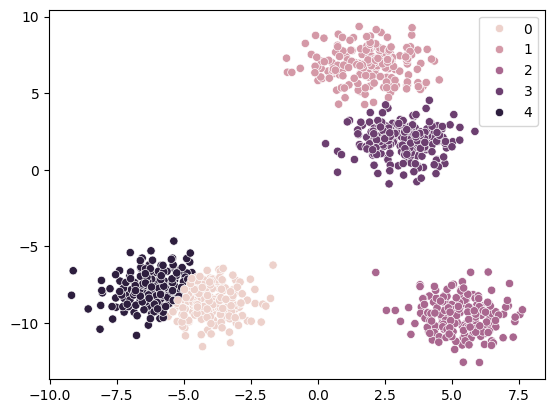

In [4]:
sns.scatterplot(x = features[:, 0], y=features[:,1], hue = y_pred)

## PCA

- A type of unsupervised learning
- High-Dimensional Data: Real-world datasets often have hundreds of features (columns).
- Hard to visualize (we can't see in 100D).
- Computational cost (too many variables).
- Multicollinearity: Many variables measure the same underlying thing (e.g., "Height in cm" and "Height in inches").

The Goal: Reduce the number of variables while keeping as much "information" as possible.

Imagine taking a picture of a teapot. If you take it from the top, it looks like a circle (you lose info). If you take it from the side, you see the handle and spout (you keep info). PCA is the mathematical way to find the 'best angle' to take that picture.


## Variance as Information

- You can think of variance is a proxy for Information.
- If a variable doesn't change (zero variance), it tells us nothing.
- PCA rotates the coordinate system to find the axes where the data is most spread out.

## Eigenvectors

- The Covariance Matrix ($C$): A square matrix that describes the "shape" and "orientation" of the data cloud.
- Eigenvectors ($\vec{v}$):These are the directions of the new axes.
    - They point along the "principal" stretches of the data.
    - Crucially, they are orthogonal (perpendicular) to each other.
- Eigenvalues ($\lambda$):These represent the magnitude (variance) along that eigenvector.
    - A large eigenvalue = This direction holds a lot of information.
    - A tiny eigenvalue = This direction is mostly noise.

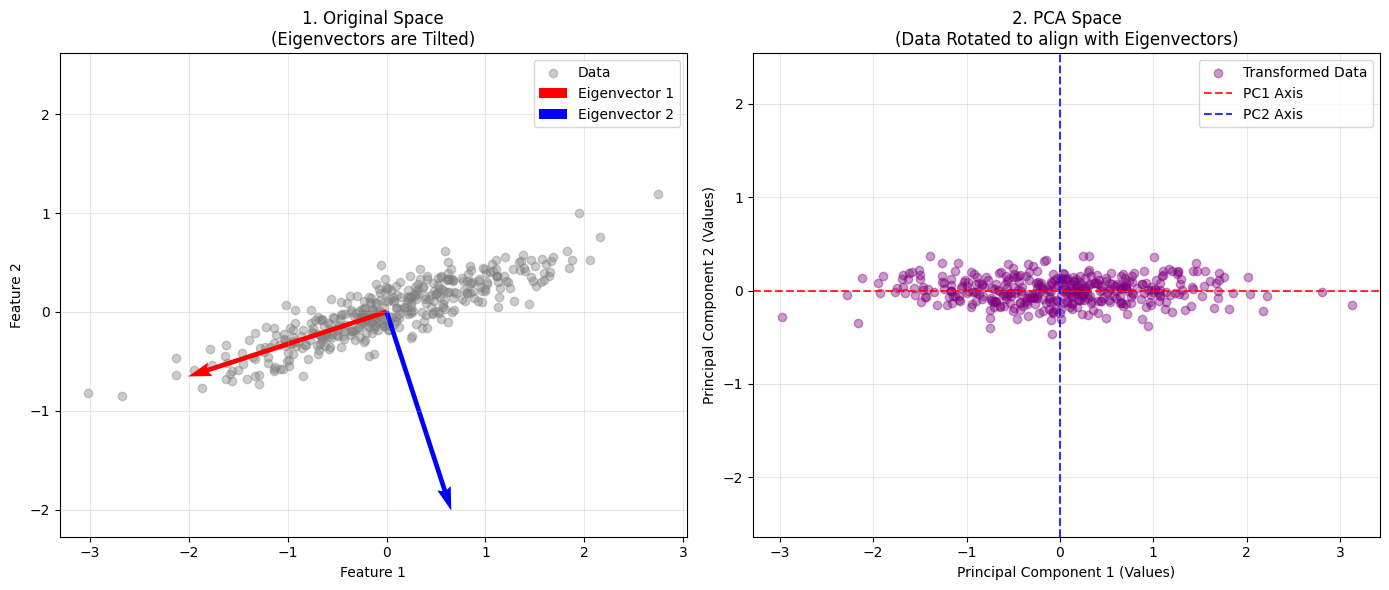

--- The Math Behind the Rotation ---
Original Covariance Matrix (Correlated):
[[0.74 0.23]
 [0.23 0.1 ]]

Transformed Covariance Matrix (Diagonal/Uncorrelated):
[[ 0.81 -0.  ]
 [-0.    0.02]]

Notice the zeros in the off-diagonals of the second matrix.
This proves the new variables (PCs) are totally uncorrelated.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

def pca_transformation_demo():
    # 1. GENERATE DATA (Same "Cigar" Shape)
    n_samples = 400
    rng = np.random.RandomState(1)
    # Stretch and rotate
    X = np.dot(rng.rand(2, 2), rng.randn(2, n_samples)).T
    
    # Standardize (Center at 0,0)
    X = X - X.mean(axis=0)

    # 2. COMPUTE EIGENVECTORS
    cov_matrix = np.cov(X, rowvar=False)
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

    # Sort Descending (Largest Variance First)
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    
    # 3. THE PCA TRANSFORMATION
    # This is the key line: We project the data onto the eigenvectors.
    # Mathematically: X_new = X dot V
    # This effectively "rotates" the data.
    X_pca = np.dot(X, eigenvectors)

    # --- VISUALIZATION ---
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # PLOT 1: Original Space (x, y)
    axes[0].scatter(X[:, 0], X[:, 1], alpha=0.4, color='gray', label='Data')
    
    # Draw the Eigenvectors on the original data
    origin = [0, 0]
    # PC1 (Red)
    axes[0].quiver(*origin, *eigenvectors[:, 0], color='r', scale=3, label='Eigenvector 1')
    # PC2 (Blue)
    axes[0].quiver(*origin, *eigenvectors[:, 1], color='b', scale=3, label='Eigenvector 2')
    
    axes[0].set_title("1. Original Space\n(Eigenvectors are Tilted)")
    axes[0].set_xlabel("Feature 1")
    axes[0].set_ylabel("Feature 2")
    axes[0].axis('equal')
    axes[0].grid(True, alpha=0.3)
    axes[0].legend()

    # PLOT 2: PCA Space (PC1, PC2)
    # Notice: The data is now aligned with the axes!
    axes[1].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.4, color='purple', label='Transformed Data')
    
    # Draw the axes (which are now the eigenvectors)
    axes[1].axhline(0, color='r', linestyle='--', alpha=0.8, label='PC1 Axis')
    axes[1].axvline(0, color='b', linestyle='--', alpha=0.8, label='PC2 Axis')
    
    axes[1].set_title("2. PCA Space\n(Data Rotated to align with Eigenvectors)")
    axes[1].set_xlabel("Principal Component 1 (Values)")
    axes[1].set_ylabel("Principal Component 2 (Values)")
    axes[1].axis('equal')
    axes[1].grid(True, alpha=0.3)
    axes[1].legend()

    plt.tight_layout()
    plt.show()

    # --- THE MATH PROOF ---
    print("--- The Math Behind the Rotation ---")
    print("Original Covariance Matrix (Correlated):")
    print(np.round(cov_matrix, 2))
    print("\nTransformed Covariance Matrix (Diagonal/Uncorrelated):")
    print(np.round(np.cov(X_pca, rowvar=False), 2))
    print("\nNotice the zeros in the off-diagonals of the second matrix.")
    print("This proves the new variables (PCs) are totally uncorrelated.")

pca_transformation_demo()

## The Algorithm

1. Standardize: Center data at 0. Scale variance to 1. (Crucial, otherwise large numbers dominate).
2. Covariance Matrix: Calculate $C = \frac{1}{n} X^T X$.
3. Eigendecomposition: Solve $C \vec{v} = \lambda \vec{v}$.
4. Sort: Rank eigenvectors by their eigenvalues (Highest $\to$ Lowest).
5. Project: Multiply original data by the top $k$ eigenvectors to get the "Principal Components."


## Why is PCA useful?

Dimensionality Reduction: Compress 100 variables into top 3 PCs (which might capture 95% of the variance).

Visualization: Allows us to plot complex data in 2D or 3D.

Noise Filtering: The smallest eigenvalues usually represent random noise. Dropping them "cleans" the signal.

Decorrelation: The resulting Principal Components are mathematically guaranteed to be uncorrelated. This is great for linear regression.


      Pixel1  Pixel2  Pixel3  Pixel4  Pixel5  Pixel6  Pixel7  Pixel8  Pixel9  \
0        0.0     0.0     5.0    13.0     9.0     1.0     0.0     0.0     0.0   
1        0.0     0.0     0.0    12.0    13.0     5.0     0.0     0.0     0.0   
2        0.0     0.0     0.0     4.0    15.0    12.0     0.0     0.0     0.0   
3        0.0     0.0     7.0    15.0    13.0     1.0     0.0     0.0     0.0   
4        0.0     0.0     0.0     1.0    11.0     0.0     0.0     0.0     0.0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
1792     0.0     0.0     4.0    10.0    13.0     6.0     0.0     0.0     0.0   
1793     0.0     0.0     6.0    16.0    13.0    11.0     1.0     0.0     0.0   
1794     0.0     0.0     1.0    11.0    15.0     1.0     0.0     0.0     0.0   
1795     0.0     0.0     2.0    10.0     7.0     0.0     0.0     0.0     0.0   
1796     0.0     0.0    10.0    14.0     8.0     1.0     0.0     0.0     0.0   

      Pixel10  ...  Pixel55  Pixel56  P

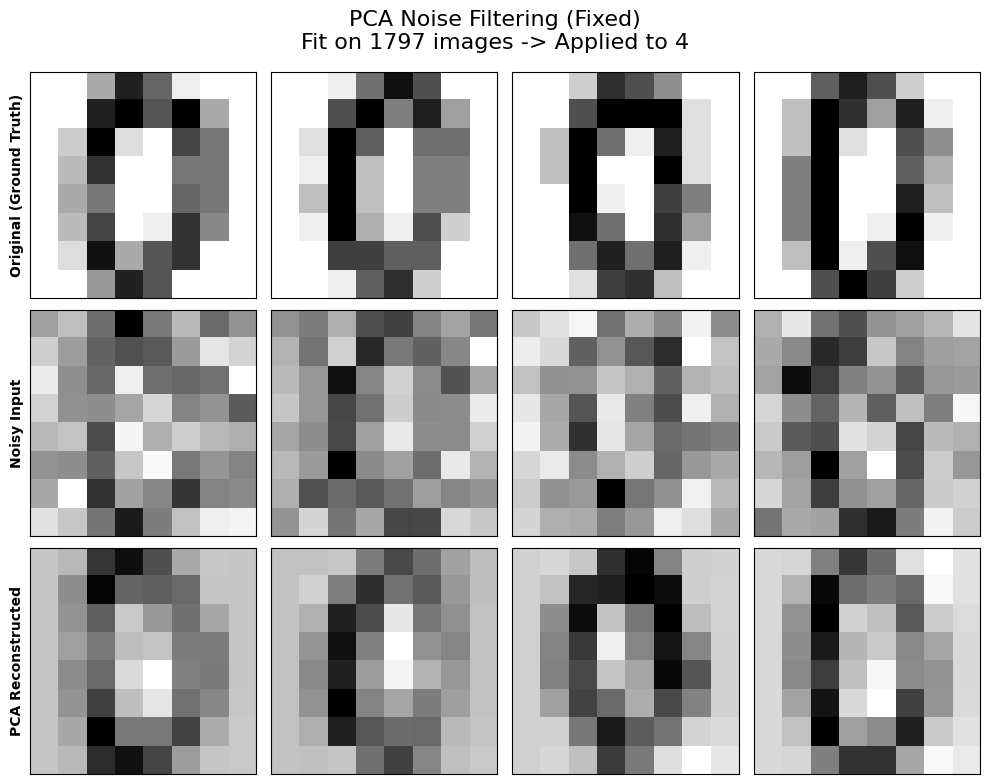

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
import pandas as pd

# Set seed for reproducibility
np.random.seed(42)

def demo_pca_noise_filtering_fixed():
    # 1. LOAD DATA
    digits = load_digits()
    # digits.data has 1797 samples. This is plenty!
    all_data = digits.data 
    
    # 2. PREPARE THE VISUALIZATION SAMPLES
    # We still want to look at these specific 4 images
    ids = [0, 10, 20, 30]
    clean_samples = all_data[ids]

    # Create a noisy version of these specific samples
    noise_factor = 6.0
    noisy_samples = clean_samples + np.random.normal(0, noise_factor, clean_samples.shape)

    # 3. APPLY PCA (The Correct Way)
    # We want 12 components. 
    # Constraint: n_components must be < min(n_samples, n_features)
    # n_samples = 1797, n_features = 64. So 12 is perfectly fine now.
    pca = PCA(n_components=12)
    
    # CRITICAL FIX: Fit on the entire dataset (all_data), not just the 4 samples.
    # This teaches PCA the "General Concept of Numbers"
    pca.fit(all_data)
    
    # Now use that learned model to clean our specific noisy samples
    components = pca.transform(noisy_samples)
    print(pd.DataFrame(all_data, columns=[f'Pixel{i+1}' for i in range(all_data.shape[1])]))
    print(pd.DataFrame(components, columns=[f'PC{i+1}' for i in range(components.shape[1])]))
    restored_samples = pca.inverse_transform(components)

    # 4. VISUALIZATION
    fig, axes = plt.subplots(3, 4, figsize=(10, 8))
    
    titles = ["Original (Ground Truth)", "Noisy Input", "PCA Reconstructed"]

    for i in range(4):
        # Original
        axes[0, i].imshow(clean_samples[i].reshape(8, 8), cmap='gray_r')
        if i == 0: axes[0, i].set_ylabel(titles[0], fontweight='bold')
        
        # Noisy
        axes[1, i].imshow(noisy_samples[i].reshape(8, 8), cmap='gray_r')
        if i == 0: axes[1, i].set_ylabel(titles[1], fontweight='bold')
        
        # Restored
        axes[2, i].imshow(restored_samples[i].reshape(8, 8), cmap='gray_r')
        if i == 0: axes[2, i].set_ylabel(titles[2], fontweight='bold')

    for ax in axes.flatten():
        ax.set_xticks([])
        ax.set_yticks([])
        
    plt.suptitle("PCA Noise Filtering (Fixed)\nFit on 1797 images -> Applied to 4", fontsize=16)
    plt.tight_layout()
    plt.show()

demo_pca_noise_filtering_fixed()

## This vs. Causality

- PCA mixes variables:

- $PC1 = 0.5 \times \text{Age} + 0.3 \times \text{Income} - 0.2 \times \text{Location}$.
- This creates "Frankenstein" variables that have no physical meaning.
- Causal Inference requires specific variables: You cannot intervene on "PC1." You can only intervene on "Income."
- In many development econ contexts, researchers might create an "index" of several variables of similar context.
- Example: you might have 25 questions on "women's empowerment." You want to create an index that summarizes the general strength of it. 
    - Adding all variables would likely create multicollinearity.


How many components to use?

## How many components should we use?

- When you run PCA analysis, you'll get back a set of principal components as variables.
- How many should you use? Are they all equally useful?

The Trade-off:

Too few components: You lose critical signal (underfitting).

Too many components: You keep the noise (overfitting) and lose the benefits of dimensionality reduction.

Common Heuristics:

Fixed Variance: "Keep enough components to explain 95% of the total variance."

The Elbow Rule: Look for the point where adding more components yields diminishing returns.

Kaiser’s Rule: Drop any component with an Eigenvalue < 1 (less informative than a single original variable).

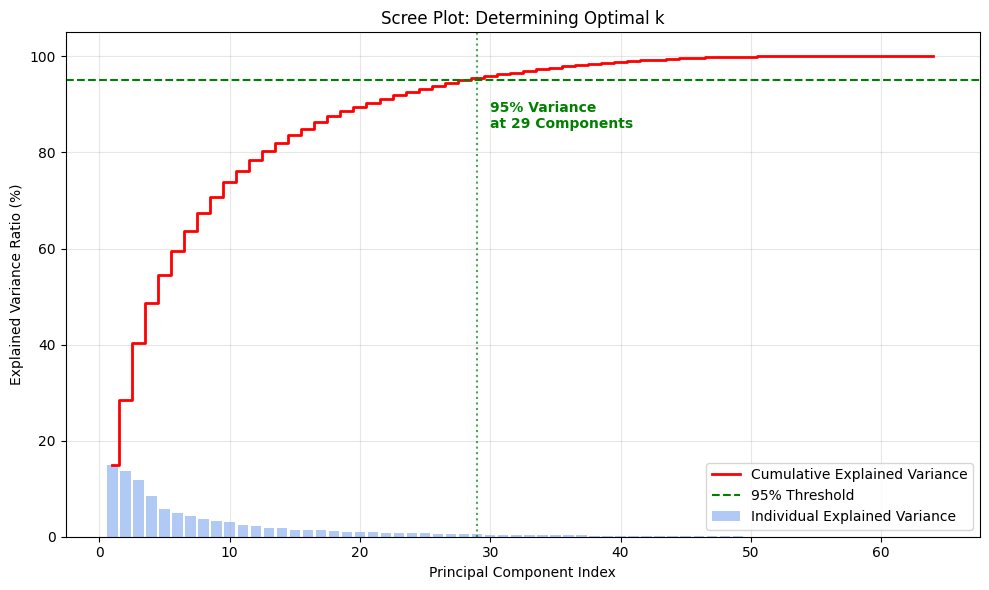

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits

def plot_scree_test():
    # 1. LOAD DATA
    # The digits dataset has 64 features (pixels)
    digits = load_digits()
    X = digits.data
    
    # 2. RUN PCA
    # We don't limit components yet because we want to see ALL of them
    pca = PCA()
    pca.fit(X)
    
    # 3. CALCULATE METRICS
    # Individual variance (how important is this specific PC?)
    exp_var = pca.explained_variance_ratio_ * 100 
    
    # Cumulative variance (how much total info do we have so far?)
    cum_var = np.cumsum(exp_var)
    
    # 4. PLOT
    plt.figure(figsize=(10, 6))
    
    # Bar Chart: Individual Variance
    plt.bar(range(1, len(exp_var) + 1), exp_var, alpha=0.5, align='center',
            label='Individual Explained Variance', color='cornflowerblue')
    
    # Step Plot: Cumulative Variance
    plt.step(range(1, len(cum_var) + 1), cum_var, where='mid',
             label='Cumulative Explained Variance', color='red', linewidth=2)
    
    # 5. VISUAL GUIDES
    # Draw a line at 95% (Common threshold)
    plt.axhline(y=95, color='green', linestyle='--', label='95% Threshold')
    
    # Find the exact component number that crosses 95%
    k_95 = np.argmax(cum_var >= 95) + 1
    plt.axvline(x=k_95, color='green', linestyle=':', alpha=0.7)
    plt.text(k_95 + 1, 85, f'95% Variance\nat {k_95} Components', color='green', fontweight='bold')

    plt.ylabel('Explained Variance Ratio (%)')
    plt.xlabel('Principal Component Index')
    plt.title('Scree Plot: Determining Optimal k')
    plt.legend(loc='best')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

plot_scree_test()

Look for the "Elbow": You will see the blue bars drop off very fast. The "bend" usually happens around component 10-15. This suggests the intrinsic dimensionality of handwritten digits is actually quite low.

Check the Green Line: The code calculates exactly how many components you need to keep 95% of the information. In this dataset, it usually drops from 64 original pixels down to about 29 components, saving you >50% of the memory with almost zero information loss.

## Supervised Learning

-  For this one, let's focus on a linear model that can "regularize", and set some coefficients to 0.
- This is called a L-1 regularized linear model or lasso model


$$
\hat{\beta} = \argmin_\beta \sum_i^{n} (y_i - \sum_j^p X_{ij}\beta_j)^2 + \alpha \sum_j^p |\beta_j|
$$

- minimize the sum of squared residuals and a non-negativity constraint on $\beta_i>0$ that is "sensitive" by the factor $\alpha$
- In this case, we have a supervised model; we have a "target" to predict

In [5]:
X, y = make_regression(noise=4, random_state=0, n_samples=100, n_features=200)

rng = np.random.default_rng(123)

In [6]:
df = (
    pd.DataFrame(X)
    .rename(columns = lambda i: f"x_{i}")
    .assign(y=y)
    )

In [7]:
df

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,x_191,x_192,x_193,x_194,x_195,x_196,x_197,x_198,x_199,y
0,-0.474107,1.317423,0.169856,-0.098936,1.910781,1.299683,0.705267,0.946540,-0.756481,2.160671,...,0.324677,-0.200513,0.119957,0.403164,-1.249444,2.485017,0.240003,0.791284,-0.590032,41.478362
1,-0.643029,2.080205,0.567826,-1.141708,1.334137,-0.529796,-0.115697,0.718440,1.671679,-0.724720,...,-0.354654,-1.211100,-0.263858,0.657179,0.958952,0.544154,0.491304,-0.255289,-1.862350,-38.122529
2,-0.408286,-0.636161,1.766742,2.059215,2.126039,-0.686504,0.084188,1.135392,0.358543,-1.534820,...,-0.645769,-0.578863,1.243770,-0.541480,-0.414337,-0.710470,1.286947,-1.724322,-0.419512,-82.988342
3,1.705586,1.371330,-0.316912,-1.052778,0.888417,1.960914,0.294599,0.237399,0.292283,-0.760276,...,0.132937,1.103324,1.275549,-0.448981,1.370400,0.789433,-0.095959,2.491486,0.770885,7.894163
4,0.347062,-0.991889,-1.025179,0.139498,-0.859405,0.469545,0.493876,-1.541678,-1.755489,1.230450,...,-0.968920,-0.041353,-0.360438,-0.182652,0.068130,-0.645297,-0.699617,-1.500188,0.609639,-261.075095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.293779,0.721699,0.001630,2.075823,-0.014429,-0.222857,-1.494804,0.818546,-0.063834,0.322195,...,0.655928,0.659182,-0.177976,0.346148,0.850839,-0.240315,-1.225037,-1.096530,0.334099,13.312561
96,2.347434,1.494072,-0.328012,-1.174913,0.035647,1.030268,0.807634,-2.025316,0.649762,0.714434,...,-0.828985,-1.249553,-0.109784,-0.714128,0.906317,0.727689,0.683909,-0.254569,-1.309056,132.762015
97,-0.689934,-0.610009,-0.760614,1.536072,0.496656,-0.643182,0.792627,1.796641,0.407969,-0.416808,...,1.322596,-0.647158,0.945243,-0.395039,0.413446,-0.432029,1.955758,1.894316,-0.098225,414.782584
98,-0.868922,-0.955843,-0.664878,-0.823549,0.538549,0.728398,0.101468,0.623174,1.224730,-0.938476,...,-0.153765,-1.284398,-0.894170,-0.388252,1.887422,0.670609,-0.276421,1.912941,-0.072911,-142.610381


In [8]:
import warnings; warnings.filterwarnings('ignore')

res = smf.ols("y ~ " + ' + '.join(df.drop(columns='y').columns), data=df).fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 09 Nov 2023   Prob (F-statistic):                nan
Time:                        11:37:23   Log-Likelihood:                 2714.8
No. Observations:                 100   AIC:                            -5230.
Df Residuals:                       0   BIC:                            -4969.
Df Model:                          99                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0295        inf         -0        nan         nan         nan
x_0           -5.8750        inf         -0        nan         nan         nan
x_1            1.9426        inf          0        nan         nan         nan
x_2            4.6700        inf          0        nan         nan         nan
x_3            1.4659        inf          0        nan         nan         nan
x_4           -4.2351        inf         -0        nan         nan         nan
x_5          -13.5535        inf         -0        nan         nan         nan
x_6            6.5235        inf          0        nan         nan         nan
x_7           -6.3044        inf         -0        nan         nan         nan
x_8            0.8235        inf          0        nan         nan         nan
x_9           -1.8063        inf         -0        nan         nan         nan
x_10          -9.4032        inf         -0        nan         nan         nan
x_11          -4.1970        inf         -0        nan         nan         nan
x_12          -7.8088        inf         -0        nan         nan         nan
x_13           9.7982        inf          0        nan         nan         nan
x_14          -5.7171        inf         -0        nan         nan         nan
x_15           1.0646        inf          0        nan         nan         nan
x_16           1.6324        inf          0        nan         nan         nan
x_17          12.7427        inf          0        nan         nan         nan
x_18           2.8498        inf          0        nan         nan         nan
x_19          -7.7846        inf         -0        nan         nan         nan
x_20          -7.7725        inf         -0        nan         nan         nan
x_21           0.8112        inf          0        nan         nan         nan
x_22           6.1047        inf          0        nan         nan         nan
x_23          -1.6940        inf         -0        nan         nan         nan
x_24          15.9195        inf          0        nan         nan         nan
x_25          -2.7578        inf         -0        nan         nan         nan
x_26          11.6216        inf          0        nan         nan         nan
x_27           4.7124        inf          0        nan         nan         nan
x_28          -0.9382        inf         -0        nan         nan         nan
x_29           9.5861        inf          0        nan         nan         nan
x_30           0.4808        inf          0        nan         nan         nan
x_31          18.6596        inf          0        nan         nan         nan
x_32          -7.7363        inf         -0        nan         nan         nan
x_33          11.4595        inf          0        nan         nan         nan
x_34           6.3885        inf          0        nan         nan         nan
x_

In [9]:
model = LinearRegression()

model.fit(X, y)

LinearRegression()

In [10]:
model.coef_

# but coefficient specific SE is not easily output

array([-5.72458448e+00,  2.01988367e+00,  4.40143737e+00,  2.00558829e+00,
       -4.06873760e+00, -1.35071109e+01,  6.62241777e+00, -6.39400168e+00,
        8.15346365e-01, -1.60408537e+00, -9.41583093e+00, -4.10753645e+00,
       -7.81035074e+00,  9.68532357e+00, -5.80387913e+00,  1.17343414e+00,
        1.68277167e+00,  1.24967872e+01,  3.00379916e+00, -7.80070271e+00,
       -7.95511680e+00,  8.31429572e-01,  6.00720014e+00, -1.57588435e+00,
        1.57668548e+01, -2.80535970e+00,  1.13861301e+01,  4.59204132e+00,
       -9.32215203e-01,  9.41574413e+00,  4.74964745e-01,  1.87651357e+01,
       -7.76096841e+00,  1.16124504e+01,  6.22548523e+00,  9.45024166e+00,
        3.85850506e+00,  8.57245169e+00,  2.03379977e+00, -1.71936112e+01,
        1.54632234e+01,  2.17745866e+00,  1.38682772e+01,  1.07195173e+01,
       -1.27875259e+01,  3.61499610e+00, -1.79062892e+00,  1.61465440e+00,
        3.76555125e+01, -1.46645627e+01,  8.13162334e+00, -1.48144045e+01,
        9.48715667e+00,  

0.2402319378288178


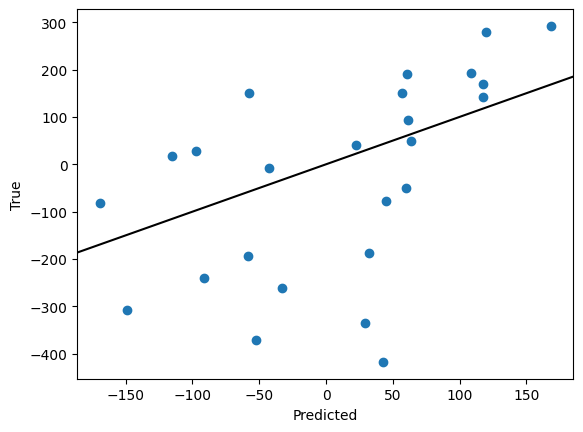

In [11]:
# Splitting data

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=123)

scaler = StandardScaler().fit(X_train)

# With scaled
X_scaled = scaler.transform(X_train)

model = LinearRegression().fit(X_scaled, y_train)

y_pred = model.predict(scaler.transform(X_test))

fig, ax = plt.subplots()

ax.scatter(y_pred, y_test)
ax.set_xlabel("Predicted")
ax.set_ylabel("True")
ax.axline(xy1=(0,0), slope=1, color='black', )


print(r2_score(y_test, y_pred))


## Lasso

0.9893669350816761


0.4413793103448276

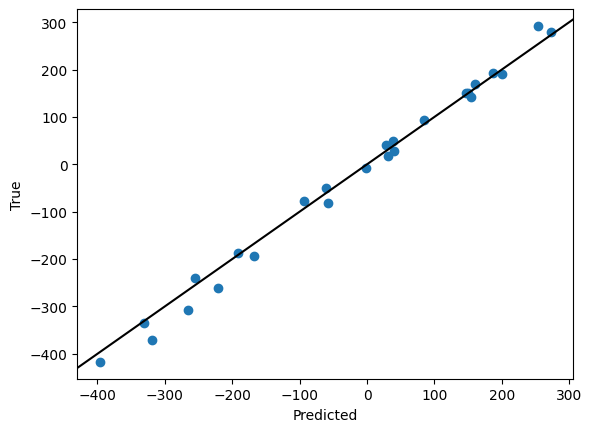

In [12]:
alphas = np.linspace(0.1,1, 30)

lasso_cv = LassoCV(alphas=alphas, random_state=0, max_iter=10000)

scaler = StandardScaler().fit(X_train)

# With scaled
X_scaled = scaler.transform(X_train)

lasso_cv.fit(X_scaled, y_train)

y_pred_lasso = lasso_cv.predict(X_test)

fig, ax = plt.subplots()

ax.scatter(y_pred_lasso, y_test)
ax.set_xlabel("Predicted")
ax.set_ylabel("True")
ax.axline(xy1=(0,0), slope=1, color='black', )

print(r2_score(y_test, y_pred_lasso))

lasso_cv.alpha_

In [13]:
## which features go to 0?

lasso_cv.coef_

array([-0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -5.25640044e-02, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -4.78931151e-01, -0.00000000e+00,
       -0.00000000e+00,  8.14645526e-02,  0.00000000e+00, -0.00000000e+00,
       -2.35845668e-01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  3.98458900e-01, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  4.72353248e+01,
        0.00000000e+00,  1.74933791e+01,  0.00000000e+00,  2.60633611e-01,
       -0.00000000e+00,  1.11537103e-01,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  3.28934850e+01, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        8.73139860e+01, -0.00000000e+00, -0.00000000e+00, -1.87398259e-01,
        0.00000000e+00, -

In [14]:
res.params.values

array([-1.02954667e+00, -5.87497394e+00,  1.94260117e+00,  4.66997408e+00,
        1.46587103e+00, -4.23508842e+00, -1.35535056e+01,  6.52349269e+00,
       -6.30438011e+00,  8.23517642e-01, -1.80631726e+00, -9.40320849e+00,
       -4.19700996e+00, -7.80879576e+00,  9.79815491e+00, -5.71710100e+00,
        1.06456367e+00,  1.63244618e+00,  1.27426834e+01,  2.84983900e+00,
       -7.78463621e+00, -7.77248917e+00,  8.11191606e-01,  6.10471033e+00,
       -1.69395732e+00,  1.59195074e+01, -2.75776181e+00,  1.16216180e+01,
        4.71239504e+00, -9.38190266e-01,  9.58609669e+00,  4.80750948e-01,
        1.86595763e+01, -7.73629374e+00,  1.14595105e+01,  6.38849918e+00,
        9.73959506e+00,  3.87467483e+00,  8.79220026e+00,  1.91959489e+00,
       -1.72567823e+01,  1.57212263e+01,  1.99372904e+00,  1.36380354e+01,
        1.07814100e+01, -1.27453762e+01,  3.79699867e+00, -1.76053173e+00,
        1.60128707e+00,  3.75795517e+01, -1.47149091e+01,  8.19979097e+00,
       -1.49543725e+01,  

- You can do the same thing with more regularization:
    - Add L2 regularization: Ridge Regression

$$
\hat{\beta} = \argmin_\beta \sum_i^{n} (y_i - \sum_j^p X_{ij}\beta_j)^2 + \alpha \sum_j^p \beta_j^2
$$

- Both L1 and L2: ElasticNet

$$
\hat{\beta} = \argmin_\beta \sum_i^{n} (y_i - \sum_j^p X_{ij}\beta_j)^2 + \alpha_1 \sum_j^p |\beta_j| + \alpha_2 \sum_j^p \beta_j^2
$$

- The need for each will be dependent on your case
    - L2 regularization has better properties (convex cost function)
    - L1 actually makes some features equal to 0!
        - So better for selecting features and making a smaller sample of features
        - Lasso is good, for example, for reducing the number of features to a number less than N, so OLS is more well-defined


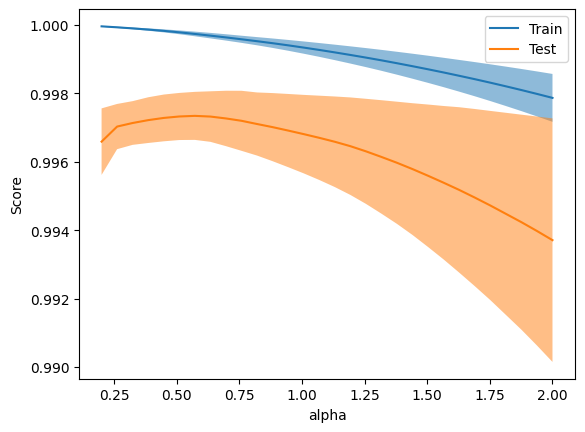

In [15]:

lasso = Lasso()

scaler = StandardScaler().fit(X_train)

# With scaled
X_scaled = scaler.transform(X_train)

param_name, param_range = 'alpha', np.linspace(0.2,2, 30)

ValidationCurveDisplay.from_estimator(
     lasso, X_scaled, y_train, param_name=param_name,
     param_range=param_range,
)

- Training Accuracy goes down
    - Why?
    - Because you're penalizing the model;
        - get lower training performance, but increase out-of-sample testing performance
    - Testing accuracy goes up at its optimum and then reduces as well; evidence of underfitting
    

## SVM

- Support Vector Machines are a popular model to use as they are scalable, easy to understand and perform well
- Usually used in classification models, it tries to find a "decision boundary" between points that divides up different categories
- Two parameters important to tune, regularization parameter, C, the kernel, and gamma, a parameter that determines how "curvy" to make the separation

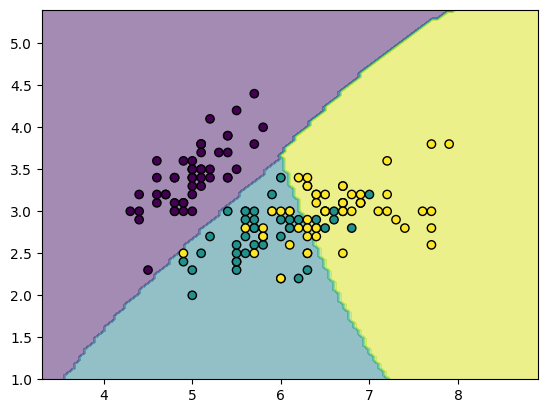

In [16]:
X, y = load_iris(return_X_y=True)

X = X[:, :2]

model = SVC(kernel='rbf') #'linear'

model.fit(X, y)

disp = DecisionBoundaryDisplay.from_estimator(model, X, response_method='predict', alpha=0.5)

disp.ax_.scatter(X[:, 0], X[:, 1], c = y, edgecolor='k')



## Cross-validation



In [17]:
X, y = make_regression(noise=4, random_state=0, n_samples=1000, n_features=1000)

folds = KFold(5)

model = LinearRegression()

cross_validate(model, X, y, cv=folds)

{'fit_time': array([0.32156396, 0.33980799, 0.34983301, 0.27331805, 0.22876811]),
 'score_time': array([0.00074196, 0.00345087, 0.00081372, 0.00101304, 0.00072527]),
 'test_score': array([0.68787865, 0.78642959, 0.82285445, 0.76529883, 0.80579695])}

## Illustrating Underfitting and Overfitting by changing `gamma`

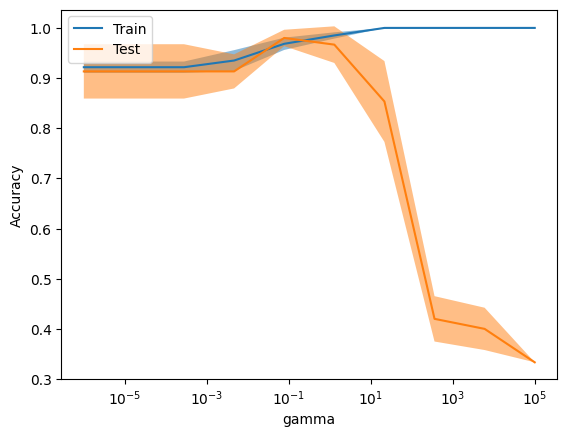

In [18]:
X, y = load_iris(return_X_y=True)


disp = ValidationCurveDisplay.from_estimator(
    SVC(kernel='rbf'),
    X,
    y,
    param_name="gamma",
    param_range=np.logspace(-6, 5, 10),
    score_type="both",
    n_jobs=2,
    score_name="Accuracy",
)

## Is more data always better?

- Oftentimes, we think that increases to sample size are always a good thing
- But although you might get increases to accuracy, there a decreasing returns, especially if you're not doing anything to get data to fill out parts of the distribution you don't have


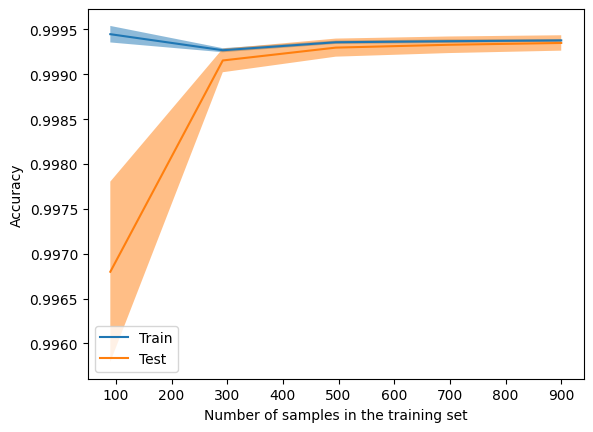

In [19]:
X, y = make_regression(noise=4, random_state=0, n_samples=1000, n_features=1000)

disp = LearningCurveDisplay.from_estimator(
    Lasso(),
    X,
    y,
    cv=10,
    score_type="both",
    n_jobs=2,
    score_name="Accuracy",
)

## Tree Models

- Decisions tree models (RandomForest, gradient boosting) are great at capturing non-linearities in very nonlinear data
- But they become overfit very fast
- There are many parameters to tune with decision trees, and they require validation 
    - Can be used for classification or regression
    

## Classification

- For classification problems, the goal of a decision tree is to find the correct cuts that will predict the classes well

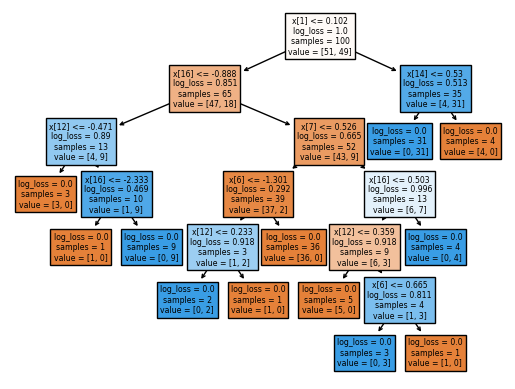

In [35]:
X_t,y_t = make_classification(random_state=1, class_sep=.3)


model = DecisionTreeClassifier(max_depth=6, criterion='log_loss') # 1,2,3,4,5

model.fit(X_t, y_t)

plot_tree(model, filled=True);

In [21]:
model.feature_importances_

array([0.        , 0.49593993, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.33335725,
       0.        , 0.17070282, 0.        , 0.        , 0.        ])

In [36]:
c_val = cross_validate(model, X_t, y_t)

c_val

{'fit_time': array([0.0015142 , 0.0014739 , 0.00130892, 0.00137877, 0.00128889]),
 'score_time': array([0.00059605, 0.00044107, 0.00042224, 0.00041914, 0.00064492]),
 'test_score': array([0.7 , 0.6 , 0.8 , 0.75, 0.8 ])}

In [37]:
c_val['test_score'].mean()

0.7299999999999999

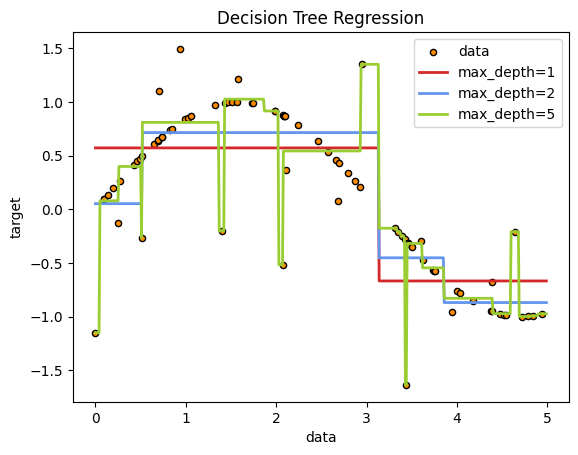

In [38]:
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_3 = DecisionTreeRegressor(max_depth=1)

regr_1.fit(X, y)
regr_2.fit(X, y)
regr_3.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)
y_3 = regr_3.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_3, color="tab:red", label="max_depth=1", linewidth=2)
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

## Tuning a Model with many Parameters

- For some models, like Lasso, `sklearn` provides a CV method that can tune it, because you only have one parameter to tune
- For models like tree models, you often have to tune multiple parameters that have to do with the evolution of the behavior of the tree
- You can use a grid search in order to tune all those parameters


In [39]:

param_grid = {'max_depth': [1,2,3,4,5,6,7,10,20,30], 
   'splitter': ['best', 'random'], 
   'min_samples_split' : np.linspace(0,1,5),
   'max_features' : np.linspace(0,1,5)
   }

model = DecisionTreeClassifier()

X_train, X_test, y_train, y_test = train_test_split(X_t, y_t)

gs = GridSearchCV(model, param_grid=param_grid, cv=10, verbose=10, n_jobs=10)

gs.fit(X_train, y_train)

Fitting 10 folds for each of 500 candidates, totalling 5000 fits
[CV 6/10; 1/500] START max_depth=1, max_features=0.0, min_samples_split=0.0, splitter=best
[CV 2/10; 1/500] START max_depth=1, max_features=0.0, min_samples_split=0.0, splitter=best
[CV 5/10; 1/500] START max_depth=1, max_features=0.0, min_samples_split=0.0, splitter=best
[CV 10/10; 1/500] START max_depth=1, max_features=0.0, min_samples_split=0.0, splitter=best
[CV 2/10; 1/500] END max_depth=1, max_features=0.0, min_samples_split=0.0, splitter=best;, score=nan total time=   0.0s[CV 5/10; 1/500] END max_depth=1, max_features=0.0, min_samples_split=0.0, splitter=best;, score=nan total time=   0.0s

[CV 6/10; 1/500] END max_depth=1, max_features=0.0, min_samples_split=0.0, splitter=best;, score=nan total time=   0.0s
[CV 10/10; 1/500] END max_depth=1, max_features=0.0, min_samples_split=0.0, splitter=best;, score=nan total time=   0.0s
[CV 9/10; 1/500] START max_depth=1, max_features=0.0, min_samples_split=0.0, splitter=bes

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=10,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 10, 20, 30],
                         'max_features': array([0.  , 0.25, 0.5 , 0.75, 1.  ]),
                         'min_samples_split': array([0.  , 0.25, 0.5 , 0.75, 1.  ]),
                         'splitter': ['best', 'random']},
             verbose=10)

In [40]:
gs.best_params_

{'max_depth': 7,
 'max_features': 1.0,
 'min_samples_split': 0.25,
 'splitter': 'random'}

In [41]:
gs.best_score_

0.7946428571428571

In [42]:
gs_best = gs.best_estimator_

gs_best

DecisionTreeClassifier(max_depth=7, max_features=1.0, min_samples_split=0.25,
                       splitter='random')

In [43]:
gs_best.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, max_features=1.0, min_samples_split=0.25,
                       splitter='random')

In [44]:
cross_validate(gs_best, X_t, y_t)['test_score'].mean()

0.64